The analysis of the Zomato dataset focuses on understanding the factors influencing the establishment of various types of restaurants in different areas of Bengaluru, as well as assessing the aggregate ratings of these restaurants. Bengaluru, a city with over 12,000 restaurants offering cuisine from around the world, experiences a growing demand for dining establishments. Despite this increasing demand, new restaurants often struggle to compete with well-established ones, many of which serve similar dishes.

Bengaluru, as India's IT capital, has a population that heavily relies on restaurant food due to time constraints. This high demand for restaurants underscores the importance of studying location demographics. The analysis aims to answer questions such as:

Popular Cuisine Types: What types of cuisine are more popular in different localities?

Factors Influencing Restaurant Choice: What factors influence restaurant choices, including location and ratings.

Locality with Most Restaurants: Which locality in the city has the highest number of restaurants serving a particular cuisine?

Neighborhood Specialties: Are certain neighborhoods famous for particular types of cuisine?

To answer these questions, the analysis will utilize data, examining factors like restaurant location, food pricing, and ratings. By studying these aspects, the analysis aims to provide insights into the culinary preferences and dining habits of Bengaluru's residents and visitors.

Although their are more than 10000+ restaurants in bengaluru but i have scrapeed only 500+ restaurants so analysis will be according to this sample dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading csv file

df=pd.read_csv(r'data/complete_data.csv')
# data contains only 500+ restaurant details for bangalore city only.

In [3]:
# getting first five rows of dataset

df.head()

,Unnamed: 0,Restaurant_id,name,urls,ratings,price for one,cuisine,delivery_reviews_Count,restaurant_address,Latitude,Longtitude
0,0,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,"Arabian, Biryani, North Indian, Chinese, Fast ...",1892,"Vijay Nagar, Bangalore",12.959769,77.531760
1,1,R1,Hotel Revoli Inn,https://www.zomato.com/bangalore/hotel-revoli-...,3.9,250,"Chinese, North Indian, Mughlai",1862,"Shanti Nagar, Bangalore",12.955977,77.592071
2,2,R2,Bakingo,https://www.zomato.com/bangalore/bakingo-vasan...,4.2,250,"Bakery, Desserts",748,"Vasanth Nagar, Bangalore",12.994415,77.593820
3,3,R3,Truffles,https://www.zomato.com/bangalore/truffles-2-st...,4.3,250,"Burger, American, Bakery, Italian, Oriental, C...",1822,"St. Marks Road, Bangalore",12.971928,77.601063
4,4,R4,McDonald's,https://www.zomato.com/bangalore/mcdonalds-mg-...,3.9,250,"Burger, Fast Food",5809,"MG Road, Bangalore",12.976022,77.598278


In [5]:
# dropping column

df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
# shape of data

df.shape

(519, 10)

In [7]:
# columns

df.columns

Index(['Restaurant_id', 'name', 'urls', 'ratings', 'price for one', 'cuisine',
       'delivery_reviews_Count', 'restaurant_address', 'Latitude',
       'Longtitude'],
      dtype='object')

In [27]:
col=['ratings','price for one','delivery_reviews_Count','Latitude','Longtitude'] # these columns must be numeric

In [9]:
# datatypes of every column

df.dtypes

Restaurant_id              object
name                       object
urls                       object
ratings                   float64
price for one               int64
cuisine                    object
delivery_reviews_Count      int64
restaurant_address         object
Latitude                  float64
Longtitude                float64
dtype: object

In [10]:
# null values column wise

df.isnull().sum()

Restaurant_id             0
name                      0
urls                      0
ratings                   0
price for one             0
cuisine                   0
delivery_reviews_Count    0
restaurant_address        0
Latitude                  0
Longtitude                0
dtype: int64

In [11]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant_id           519 non-null    object 
 1   name                    519 non-null    object 
 2   urls                    519 non-null    object 
 3   ratings                 519 non-null    float64
 4   price for one           519 non-null    int64  
 5   cuisine                 519 non-null    object 
 6   delivery_reviews_Count  519 non-null    int64  
 7   restaurant_address      519 non-null    object 
 8   Latitude                519 non-null    float64
 9   Longtitude              519 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 40.7+ KB


In [21]:
# statistical summary of dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant_id,519,519,R0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,519,497,Hari Super Sandwich,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urls,519,519,https://www.zomato.com/bangalore/le-arabia-res...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ratings,519.0,NaN,NaN,NaN,3.962042,0.287051,3.0,3.8,4.0,4.2,4.6
price for one,519.0,NaN,NaN,NaN,181.791908,73.592763,50.0,150.0,200.0,250.0,350.0
cuisine,519,414,"Bakery, Desserts",15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery_reviews_Count,519.0,NaN,NaN,NaN,5064.589595,9035.425014,1.0,483.5,1567.0,5257.5,80800.0
restaurant_address,519,68,"BTM, Bangalore",48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,519.0,NaN,NaN,NaN,12.966676,0.029281,12.89775,12.940284,12.97007,12.987756,13.034088
Longtitude,519.0,NaN,NaN,NaN,77.599223,0.028732,77.53167,77.579384,77.604017,77.615665,77.666735


In [13]:
# unique values in each column

df.nunique()

Restaurant_id             519
name                      497
urls                      519
ratings                    17
price for one               7
cuisine                   414
delivery_reviews_Count    483
restaurant_address         68
Latitude                  494
Longtitude                495
dtype: int64

In [14]:
#duplicate values in the dataset

df.duplicated().sum()

0

In [28]:
df[col].corr()

,ratings,price for one,delivery_reviews_Count,Latitude,Longtitude
ratings,1.000000,0.020224,-0.014717,0.107777,-0.016928
price for one,0.020224,1.000000,-0.024123,-0.085216,-0.074350
delivery_reviews_Count,-0.014717,-0.024123,1.000000,-0.159808,-0.051346
Latitude,0.107777,-0.085216,-0.159808,1.000000,-0.129762
Longtitude,-0.016928,-0.074350,-0.051346,-0.129762,1.000000


### Data description

Data has records of 519 restaurants and every record has 10 fields.

['Ratings','Price for one','Delivery_reviews_Count','Latitude','Longtitude']- These column are numeric.

['Restaurant_id','name','urls','cuisine','restaurant_address']- These columns are categorical.

Their are no null values in the dataset.

Their are no duplicate values in the dataset.

Columns description-

Restaurant_id - This is a unique id given to each restaurant by me for this dataset only.

name - Name of Restaurant

urls - Urls of Restaurant's on zomato..

cuisine - Cuisines served at that particular place like Chinese, Indian etc...

ratings - Rating of the restaurant on zomato.

price for one- Average cost for one person to eat there food(in INR)

delivery_reviews_count - Number of reviews received about the restaurant from customers on zomato..

Restaurant_address- Address of the restaurant.

Longitude - Longitude coordinate value of the location where the restaurant is located

Latitude - Latitude coordinate value of the location where the restaurant is located..

# Detailed Analysis with Data Visualization..

<Axes: >

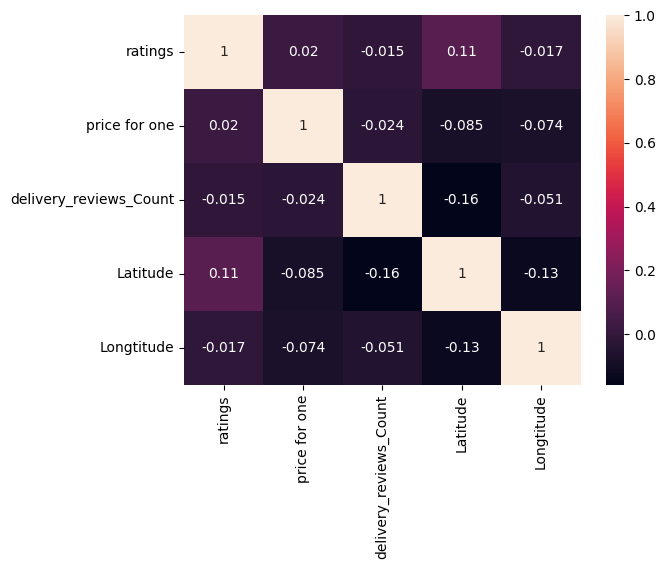

In [29]:
sns.heatmap(data=df[col].corr(),annot=True)

Their is no strong correlation among any of the two numerical columns.

In [30]:
df.head(1)

,Restaurant_id,name,urls,ratings,price for one,cuisine,delivery_reviews_Count,restaurant_address,Latitude,Longtitude
0,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,"Arabian, Biryani, North Indian, Chinese, Fast ...",1892,"Vijay Nagar, Bangalore",12.959769,77.53176


<Axes: xlabel='ratings', ylabel='count'>

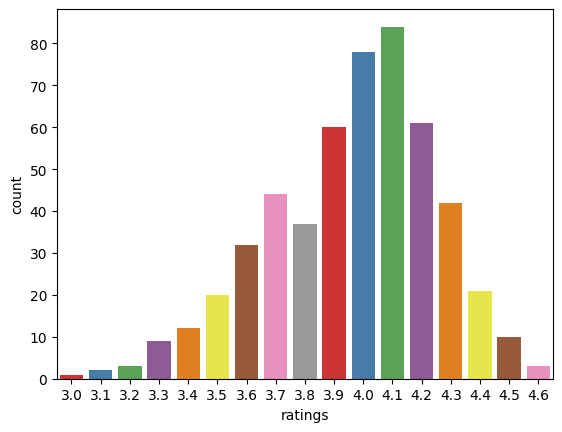

In [31]:
# distribution of restaurants as per ratings..

sns.countplot(data=df[col],x='ratings',palette='Set1')

In [33]:
# Top 10 locations with most number of restaurants

df.groupby('restaurant_address')['name'].count().sort_values(ascending=False)[:10]

restaurant_address
BTM, Bangalore                   48
Indiranagar, Bangalore           29
Basavanagudi, Bangalore          26
Shanti Nagar, Bangalore          23
Rajajinagar, Bangalore           21
Vijay Nagar, Bangalore           18
Frazer Town, Bangalore           17
Basaveshwara Nagar, Bangalore    16
Brigade Road, Bangalore          15
Jayanagar, Bangalore             15
Name: name, dtype: int64

Text(0.5, 1.0, 'Address wise count of restaurants')

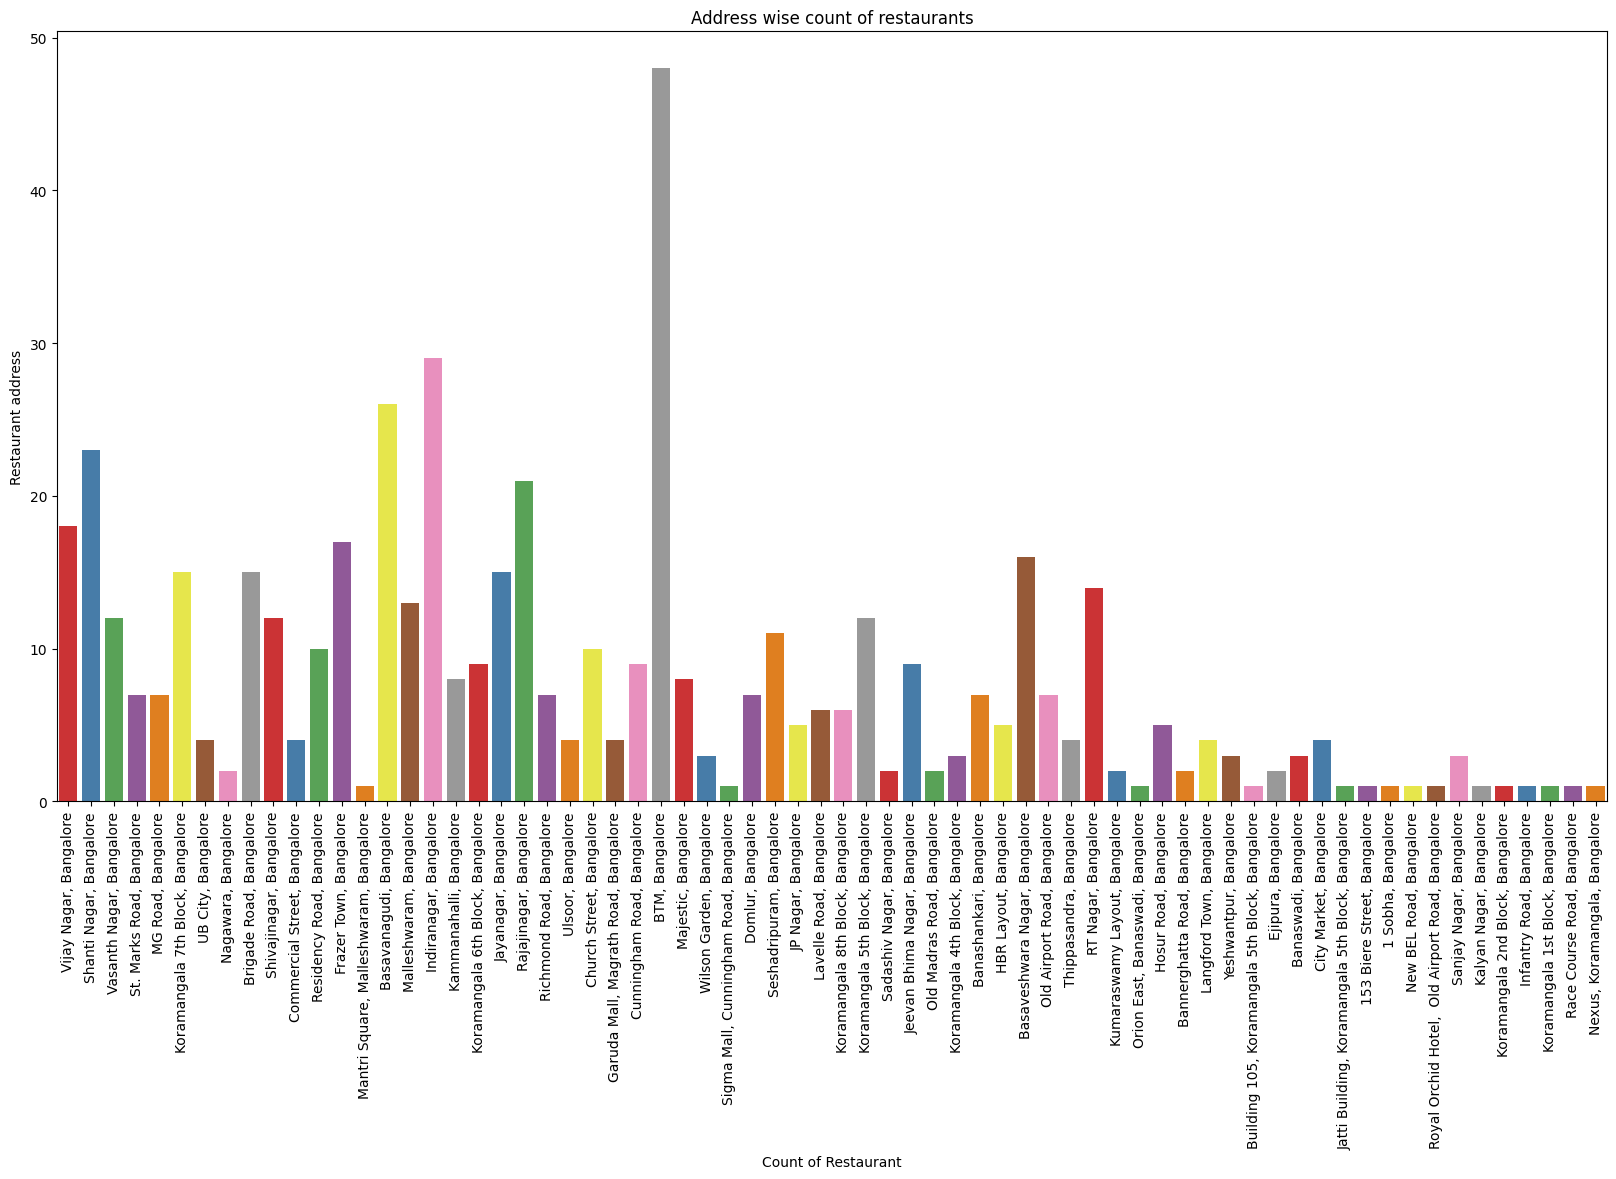

In [38]:
# address wise number of restaurants available

plt.figure(figsize=(20,10))
sns.countplot(data=df,x='restaurant_address',palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Count of Restaurant')
plt.ylabel('Restaurant address')
plt.title('Address wise count of restaurants')

<Axes: xlabel='price for one', ylabel='count'>

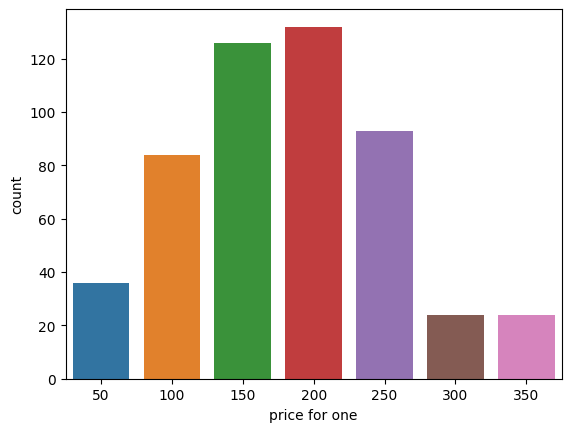

In [39]:
# Distribution of restaurant as per price range for one.

sns.countplot(data=df,x='price for one')

Text(0.5, 1.0, 'Histplot for delivery reviews count - binsize is of 5000')

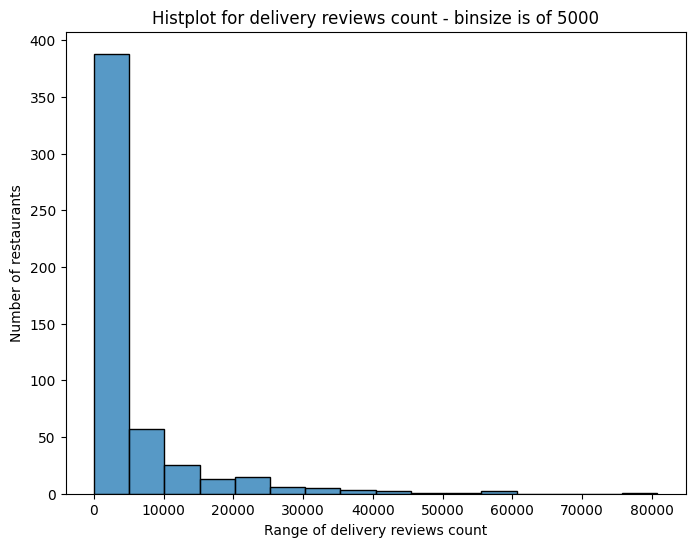

In [47]:
# Histogram for number of delivery_reviews
plt.figure(figsize=(8,6))
sns.histplot(df,x='delivery_reviews_Count',bins=16,palette='Set1')
plt.xlabel('Range of delivery reviews count')
plt.ylabel('Number of restaurants')
plt.title('Histplot for delivery reviews count - binsize is of 5000')

Text(0.5, 1.0, 'Price for one Vs Average rating of restaurants')

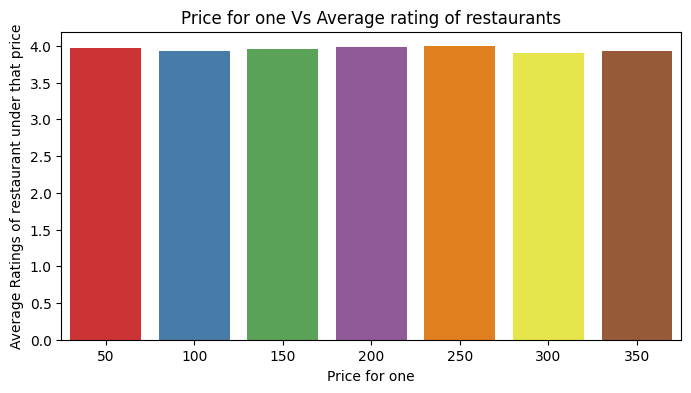

In [58]:
# Price for one wise Average ratings.

result_df=df.groupby('price for one')['ratings'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=result_df, x='price for one', y='ratings',orient="v",palette='Set1')
plt.xlabel('Price for one')
plt.ylabel('Average Ratings of restaurant under that price')
plt.title('Price for one Vs Average rating of restaurants')

Text(0.5, 1.0, 'Price for one Vs Sum of reviews of restaurants')

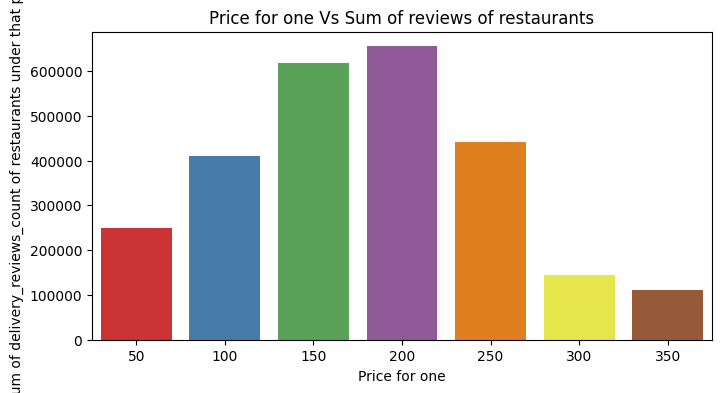

In [57]:
# Price for one wise sum of delivery_reviews count.

result_df=df.groupby('price for one')['delivery_reviews_Count'].sum().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=result_df, x='price for one', y='delivery_reviews_Count',orient="v",palette='Set1')
plt.xlabel('Price for one')
plt.ylabel('Sum of delivery_reviews_count of restaurants under that price')
plt.title('Price for one Vs Sum of reviews of restaurants')

Text(0.5, 1.0, 'Rating wise average price of all restaurants')

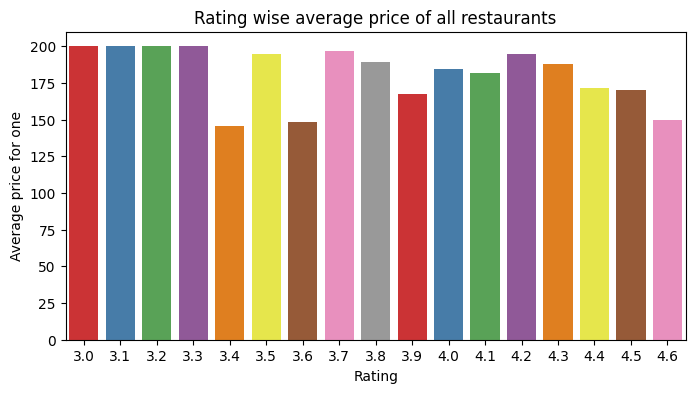

In [51]:
# Ratings wise Average Price for one.

result_df=df.groupby('ratings')['price for one'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=result_df, x='ratings', y='price for one',orient="v",palette='Set1')
plt.xlabel('Rating')
plt.ylabel('Average price for one')
plt.title('Rating wise average price of all restaurants')

Text(0.5, 1.0, 'Rating wise sum of delivery reviews count of all restaurants')

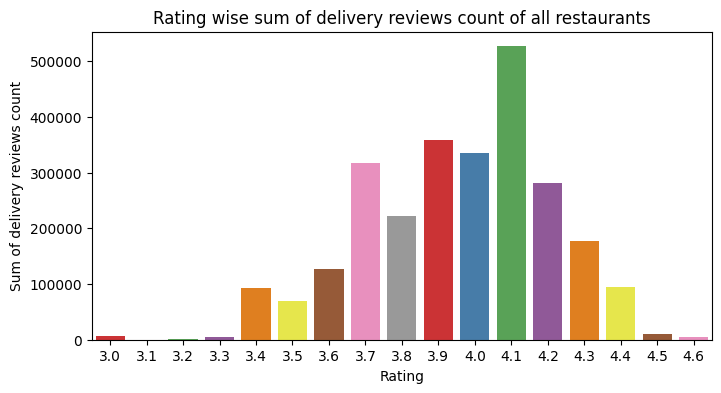

In [60]:
# Ratings wise sum of delivery reviews count.

result_df=df.groupby('ratings')['delivery_reviews_Count'].sum().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=result_df, x='ratings', y='delivery_reviews_Count',orient="v",palette='Set1')
plt.xlabel('Rating')
plt.ylabel('Sum of delivery reviews count')
plt.title('Rating wise sum of delivery reviews count of all restaurants')

In [54]:
# Top 20 locations on the basis of total sum of delivery reviews count.

df.groupby('restaurant_address')['delivery_reviews_Count'].sum().sort_values(ascending=False)[:20]

restaurant_address
BTM, Bangalore                      529449
Vijay Nagar, Bangalore              178700
Koramangala 7th Block, Bangalore    177436
Basavanagudi, Bangalore             147424
Malleshwaram, Bangalore             144077
Basaveshwara Nagar, Bangalore       140255
Indiranagar, Bangalore              105453
JP Nagar, Bangalore                  99526
Frazer Town, Bangalore               84487
Rajajinagar, Bangalore               75009
Shivajinagar, Bangalore              64589
Banashankari, Bangalore              64390
Jayanagar, Bangalore                 52684
Jeevan Bhima Nagar, Bangalore        50108
RT Nagar, Bangalore                  49862
Residency Road, Bangalore            48954
Old Airport Road, Bangalore          45074
Koramangala 5th Block, Bangalore     39829
Thippasandra, Bangalore              32601
Shanti Nagar, Bangalore              32134
Name: delivery_reviews_Count, dtype: int64

<Axes: xlabel='Latitude', ylabel='Longtitude'>

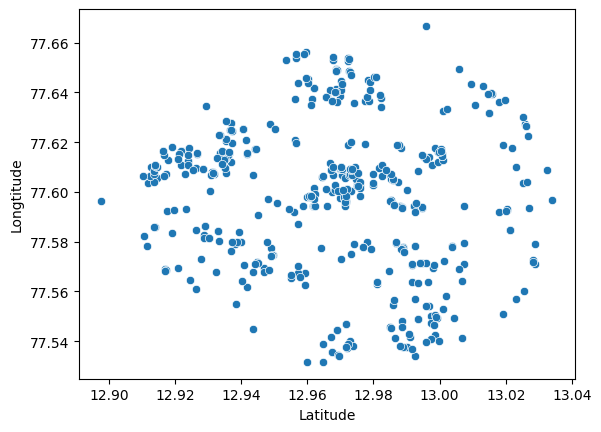

In [6]:
# locations scatter plot as per latitude and longtitude
sns.scatterplot(df,x='Latitude',y='Longtitude')

In [21]:
pd.DataFrame(df.restaurant_address.str.split(',').sum()).value_counts()[:20]

 Bangalore               519
BTM                       48
Indiranagar               29
Basavanagudi              26
Shanti Nagar              23
Rajajinagar               21
Vijay Nagar               18
Frazer Town               17
Basaveshwara Nagar        16
Brigade Road              15
Koramangala 7th Block     15
Jayanagar                 15
RT Nagar                  14
Malleshwaram              13
Shivajinagar              12
Vasanth Nagar             12
Koramangala 5th Block     12
Seshadripuram             11
Church Street             10
Residency Road            10
Name: count, dtype: int64

**Making a new dataset by splitting cuisines**

In [61]:
new_df=df

In [62]:
new_df['cuisine'] = new_df['cuisine'].apply(lambda x: x.split(','))

In [64]:
new_df.head(1)

,Restaurant_id,name,urls,ratings,price for one,cuisine,delivery_reviews_Count,restaurant_address,Latitude,Longtitude
0,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,"[Arabian, Biryani, North Indian, Chinese, ...",1892,"Vijay Nagar, Bangalore",12.959769,77.53176


In [65]:
new_df=new_df.explode('cuisine')

In [66]:
new_df.head()

,Restaurant_id,name,urls,ratings,price for one,cuisine,delivery_reviews_Count,restaurant_address,Latitude,Longtitude
0,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,Arabian,1892,"Vijay Nagar, Bangalore",12.959769,77.53176
0,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,Biryani,1892,"Vijay Nagar, Bangalore",12.959769,77.53176
0,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,North Indian,1892,"Vijay Nagar, Bangalore",12.959769,77.53176
0,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,Chinese,1892,"Vijay Nagar, Bangalore",12.959769,77.53176
0,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,Fast Food,1892,"Vijay Nagar, Bangalore",12.959769,77.53176


In [67]:
new_df.reset_index(drop=True,inplace=True)

In [70]:
new_df.head()

,Restaurant_id,name,urls,ratings,price for one,cuisine,delivery_reviews_Count,restaurant_address,Latitude,Longtitude
0,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,Arabian,1892,"Vijay Nagar, Bangalore",12.959769,77.53176
1,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,Biryani,1892,"Vijay Nagar, Bangalore",12.959769,77.53176
2,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,North Indian,1892,"Vijay Nagar, Bangalore",12.959769,77.53176
3,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,Chinese,1892,"Vijay Nagar, Bangalore",12.959769,77.53176
4,R0,Le Arabia Restaurant,https://www.zomato.com/bangalore/le-arabia-res...,3.5,250,Fast Food,1892,"Vijay Nagar, Bangalore",12.959769,77.53176


In [74]:
# Top 20 cuisines as per availability in most number of restaurant
new_df.cuisine.value_counts()[:20]

cuisine
 Beverages       196
 Desserts        167
 Chinese         150
 Fast Food       133
 North Indian    111
North Indian      80
 Street Food      77
 Shake            71
 Biryani          65
South Indian      57
 South Indian     54
Biryani           51
 Mughlai          48
 Sichuan          46
Bakery            36
 Seafood          36
 Ice Cream        36
Chinese           35
 Sandwich         34
 Rolls            28
Name: count, dtype: int64

Text(0.5, 1.0, 'Cuisine Vs Number of restaurant serving that cuisine')

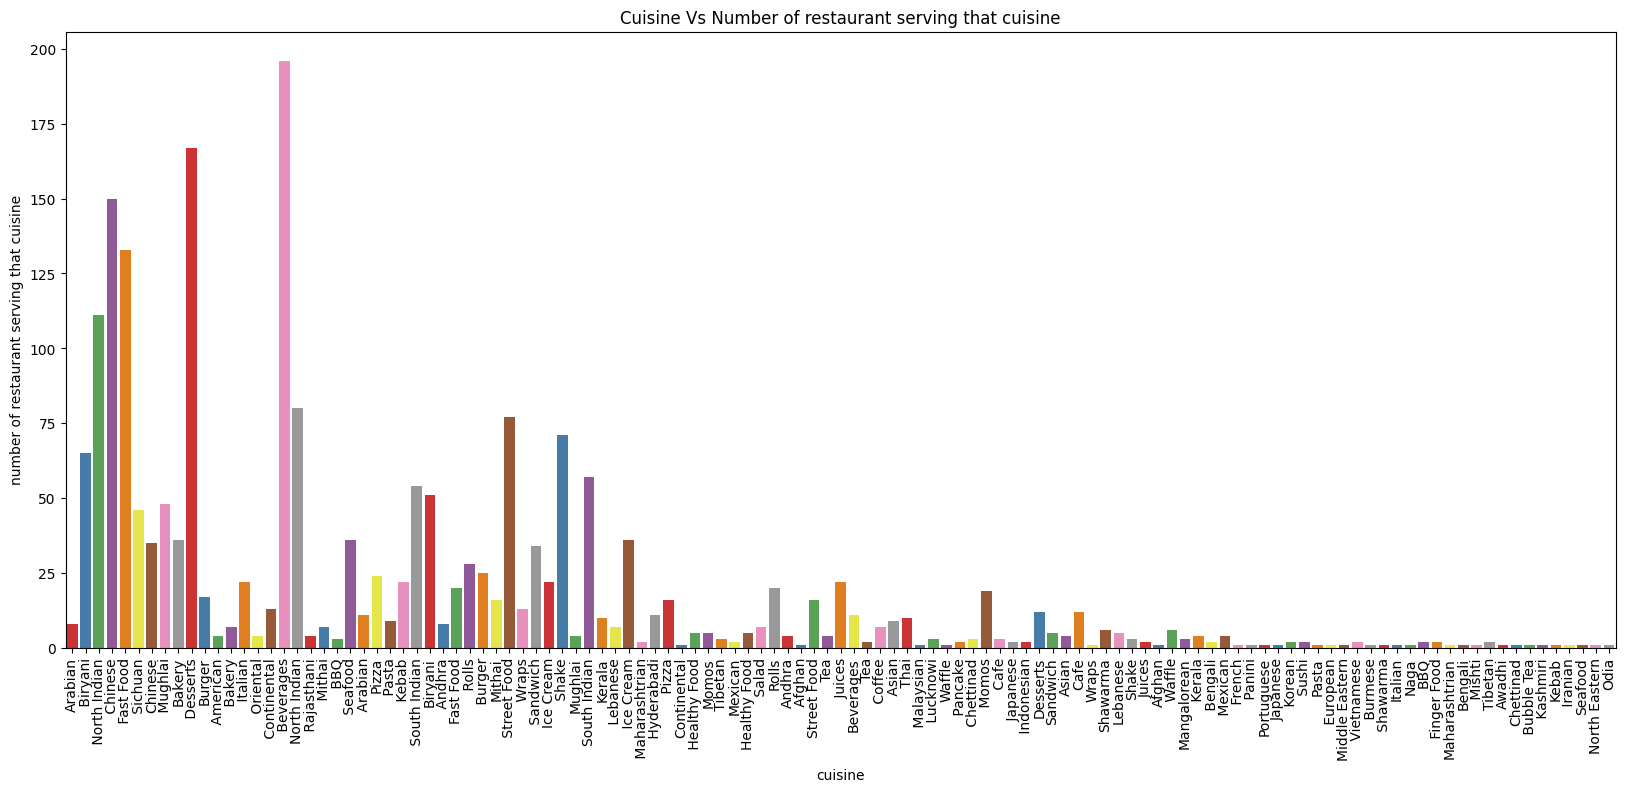

In [76]:
# Number of restaurant serving that cuisine

plt.figure(figsize=(20,8))
sns.countplot(data=new_df,x='cuisine',palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('cuisine')
plt.ylabel('number of restaurant serving that cuisine')
plt.title('Cuisine Vs Number of restaurant serving that cuisine')

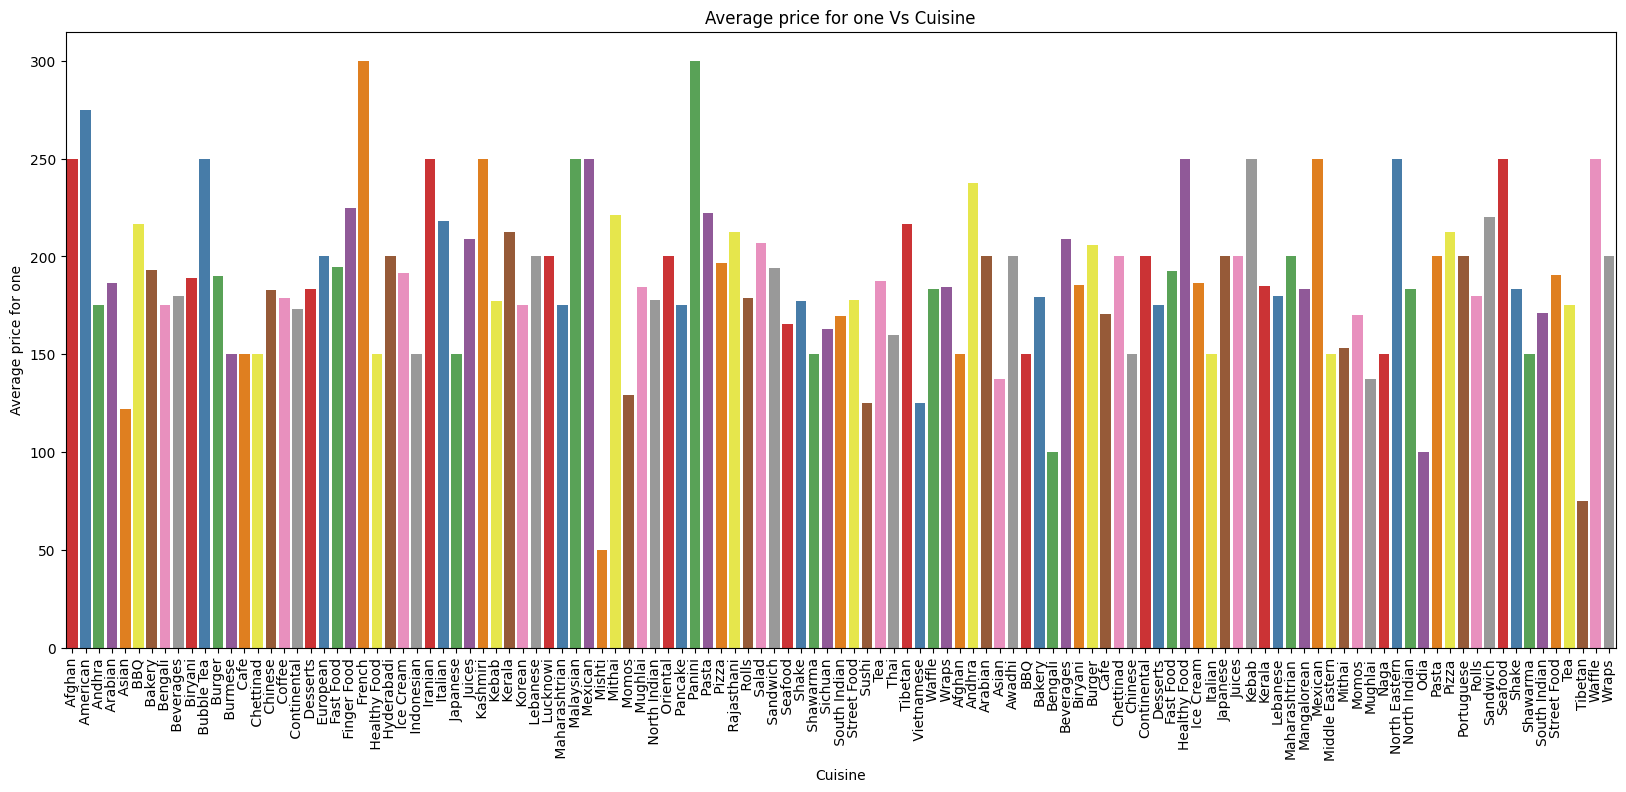

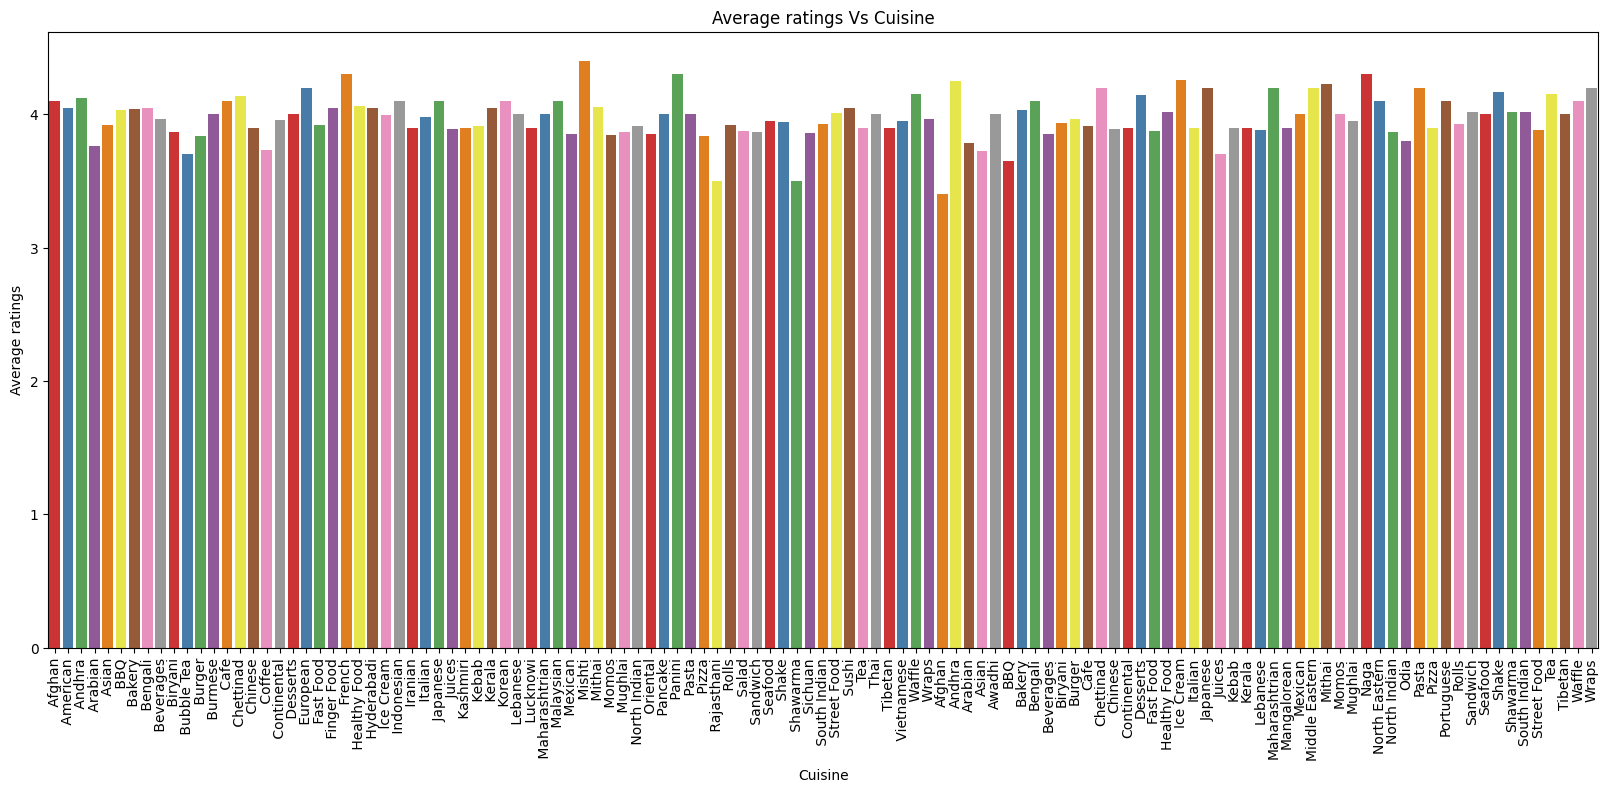

In [78]:
# Average price for one,rating of each Cuisine (as per restaurant cost and rating)
c2=['price for one','ratings']
for i in c2:
    result_df = new_df.groupby('cuisine')[i].mean().reset_index()
    plt.figure(figsize=(20,8))
    sns.barplot(data=result_df, x='cuisine',y=i,orient="v",palette='Set1')
    plt.xticks(rotation=90)
    plt.xlabel('Cuisine')
    plt.ylabel(f'Average {i}')
    plt.title(f'Average {i} Vs Cuisine')
    plt.show()

In [80]:
# number of cuisine available in a particular price

new_df.groupby('price for one')['cuisine'].count()

price for one
50     145
100    309
150    539
200    518
250    387
300    111
350     86
Name: cuisine, dtype: int64

In [33]:
# df was the old dataset with all the 500+ restaurants data but all the cuisines in that data was combined.
# new_df is the data that i created using df only but in new_df all the cuisines are in the splitted form.
# hence new_df has approx 2000+ rows but other than cuisines all other columns have duplicates.